In [117]:
import module.TorchDataset as td
import platform
import importlib

importlib.reload(td) # 클래스 수정 시 import 리로드

# os에 따라 다르게 적용 (코랩은 리눅스)
current_os = platform.system()
sep = "\\" if current_os == "Windows" else "/" 


# TrainSet
root_train = f"..{sep}01.Data{sep}fire{sep}train{sep}" # 루트폴더
extension = "jpg" # 찾을 확장자
img_size = 224

train_dataset = td.TorchDataset(root_train, extension, img_size)


# ValidSet
root_valid = f"..{sep}01.Data{sep}fire{sep}valid{sep}" # 루트폴더
extension = "jpg" # 찾을 확장자

valid_dataset = td.TorchDataset(root_valid, extension, img_size)


# TestSet
root_test = f"..{sep}01.Data{sep}fire{sep}test{sep}" # 루트폴더
extension = "jpg" # 찾을 확장자

test_dataset = td.TorchDataset(root_test, extension, img_size)

len(train_dataset), len(valid_dataset), len(test_dataset)

(30249, 6300, 6299)

In [118]:
# # 인준님 GPU 컴퓨터 파일로드용

# import module.TorchDataset as td
# import platform
# import importlib

# importlib.reload(td) # 클래스 수정 시 import 리로드

# # os에 따라 다르게 적용 (코랩은 리눅스)
# current_os = platform.system()
# sep = "\\" if current_os == "Windows" else "/" 


# # TrainSet
# root_train = f"..{sep}01.Data{sep}fire{sep}train{sep}" # 루트폴더
# extension = "jpg" # 찾을 확장자
# img_size = 224

# train_dataset = td.TorchDataset(root_train, extension, img_size)


# # ValidSet
# root_train = f"..{sep}01.Data{sep}10.fire{sep}train{sep}" # 루트폴더
# extension = "jpg" # 찾을 확장자

# valid_dataset = td.TorchDataset(root_valid, extension, img_size)


# # TestSet
# root_test = f"..{sep}01.Data{sep}10.fire{sep}test{sep}" # 루트폴더
# extension = "jpg" # 찾을 확장자

# test_dataset = td.TorchDataset(root_test, extension, img_size)

# len(train_dataset), len(valid_dataset), len(test_dataset)

In [119]:
train_dataset.get_label_dict()

{'nowildfire': 0, 'wildfire': 1}

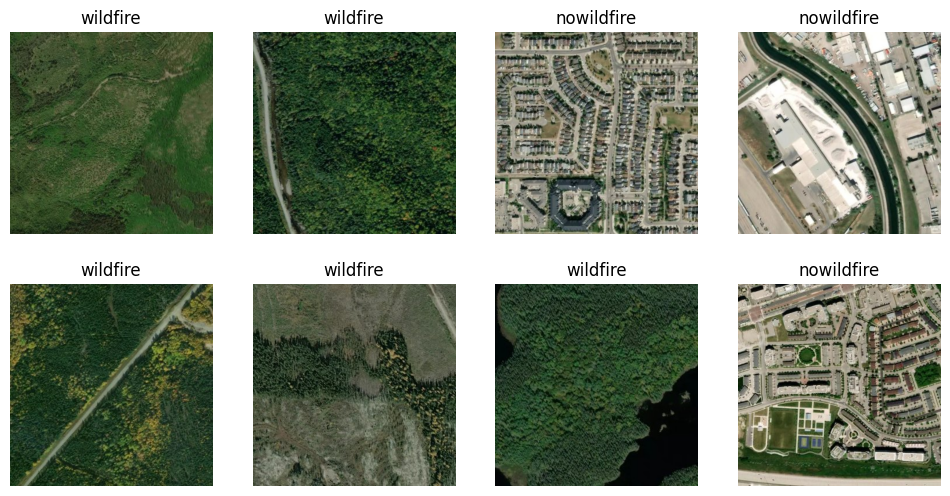

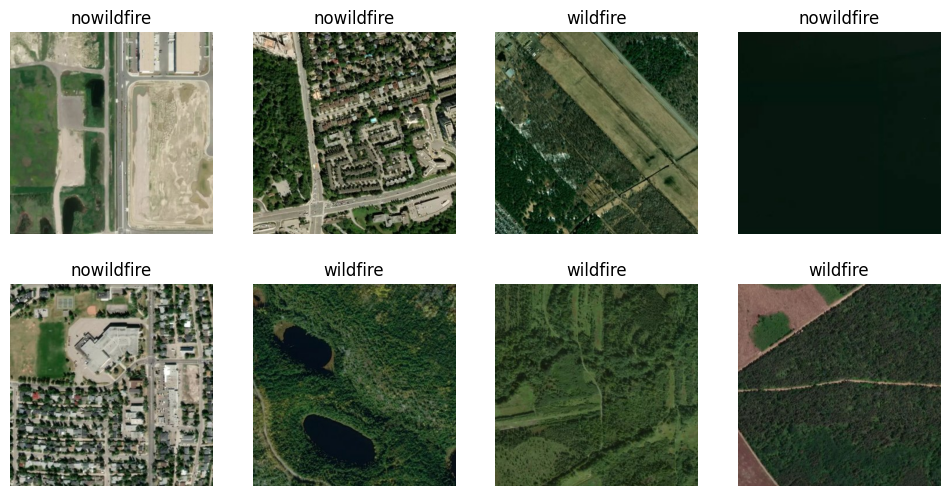

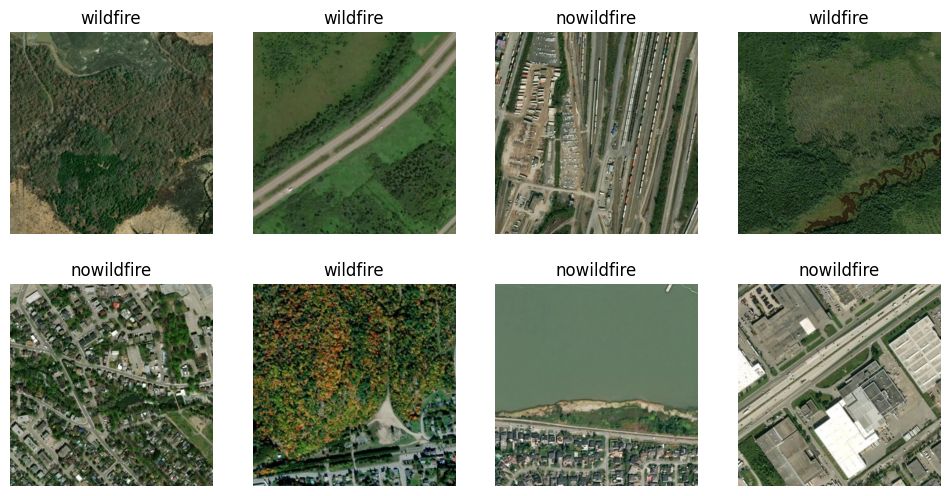

In [120]:
train_dataset.get_sample_image(8, True)
valid_dataset.get_sample_image(8, True)
test_dataset.get_sample_image(8, True)

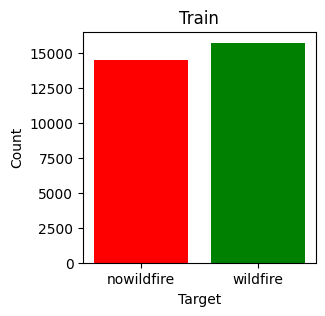

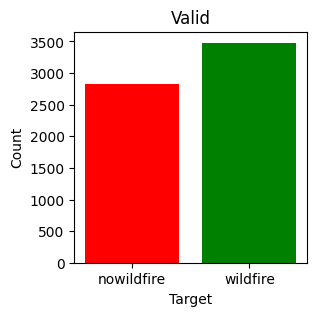

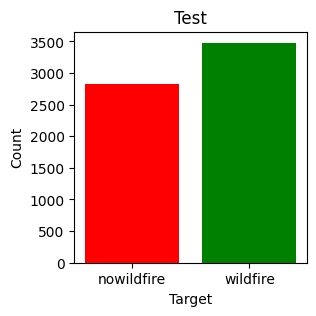

In [121]:
train_dataset.get_target_ratio("Train")
valid_dataset.get_target_ratio("Valid")
test_dataset.get_target_ratio("Test")

In [170]:
import module.TorchDatasetCNN as tdCNN
importlib.reload(tdCNN)

cnn_runner = tdCNN.TorchDatasetCNN()

train_dataloader = cnn_runner.get_dataloader(train_dataset, 10, True, True)
valid_dataloader = cnn_runner.get_dataloader(valid_dataset, 10, False, False)
test_dataloader = cnn_runner.get_dataloader(test_dataset, 10, False, False)
len(train_dataloader), len(valid_dataloader), len(test_dataloader)

(3024, 630, 630)

In [173]:
import module.CNN as CNN

epoch = 20
device = cnn_runner.get_device()
model = CNN.CNN(img_size).to(device)
learning_rate = 0.001
save_path = f"save_model{sep}03.Torch_CNN{sep}02.9_layer_Custom_CNN{sep}fire_CNN.pth"
# save_path = f"save_model{sep}03.Torch_CNN{sep}01.6_layer_Custom_CNN{sep}fire_CNN.pth"

# cnn_runner.run_epoch(epoch, train_dataloader, valid_dataloader, device, model, learning_rate, save_path)


In [174]:
# 모델 로딩
model = cnn_runner.load_model(model, save_path, device)
cnn_runner.test_model(test_dataloader, device, model)

 84%|████████▍ | 528/630 [04:41<00:50,  2.01it/s]

In [116]:
# 네이버 지도 위성사진으로 탐색 테스트 수행

import module.Service as sv
importlib.reload(sv)
service = sv.Service()
sample_path = r"..\01.Data\fire\etc\naver_map.jpg"

result_lst = service.eval_in_realmap(model, sample_path, img_size)
set(result_lst)

{0}